In [1]:
from Bio.Seq import Seq #注意是Bio.Seq
my_seq = Seq("GATTACAGATTACA")#S是大写的
my_seq
print(my_seq)
print(my_seq.complement())#补体函数
print(my_seq.reverse_complement())#反向补体函数

GATTACAGATTACA
CTAATGTCTAATGT
TGTAATCTGTAATC


In [3]:
from Bio.Data import CodonTable
my_seq = Seq("GATTACAGATTACAt")
print(my_seq)
print(my_seq[0])
print(my_seq[0:3])
print(my_seq[2:9])
your_seq=Seq("TGTAATCTGTAATCT")
print(my_seq + your_seq)#字符串
my_seq.translate()#翻译的过程

GATTACAGATTACAt
G
GAT
TTACAGA
GATTACAGATTACAtTGTAATCTGTAATCT


Seq('DYRLH')

In [4]:
from Bio import SeqIO
seq_stage1=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage1.fasta", "fasta")
seq_stage2=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage1.fasta", "fasta")
for record in seq_stage1:
    print(record.id)#print seq header
    print(repr(record.seq))#print actual seq
    print(len(record))#print lenth
    break

hCOV-19/Jiangsu/NJCDC-037/2023/1.14_1.20_01
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGT...AAA')
29870


In [5]:
from Bio import SeqIO
seq_stage1=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage1.fasta", "fasta")
seq_stage2=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage2.fasta", "fasta")
stage1_dict=SeqIO.to_dict(seq_stage1)#转化成了字典
stage2_dict=SeqIO.to_dict(seq_stage2)
print(len(stage1_dict))
print(len(stage2_dict))
#print(stage1_dict.keys())
seq_stage1_record=stage1_dict["hCOV-19/Jiangsu/NJCDC-037/2023/1.14_1.20_01"]#字典中引用某个元素
print(seq_stage1_record.description)
print(repr(seq_stage1_record.seq))
print(len(seq_stage1_record.seq))
SeqIO.write(seq_stage1_record,"C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\hCOV_19_js_test.fasta","fasta")#导出，写入

3160
3912
hCOV-19/Jiangsu/NJCDC-037/2023/1.14_1.20_01
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGT...AAA')
29870


1

In [6]:
from Bio import SeqIO
records = list(SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage1.fasta", "fasta"))
#records.sort(key=lambda r:len(r))#按照长度对这些进行排序,小的在前面
records.sort(key=lambda r:-len(r))#反方向
SeqIO.write(records,"C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\records_sort_test.fasta","fasta")
array=0
for seq_record in list(SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\records_sort_test.fasta", "fasta")):
    array+=1
    print(seq_record.id)
    #print(repr(seq_record))
    print(len(seq_record))
    if array>5:
        break

hCoV-19/Jiangsu/YZCDC-197/2023/0520_05
59548
hCoV-19/Jiangsu/YZCDC-198/2023/0520_05
59548
hCoV-19/Jiangsu/YZCDC-199/2023/0520_05
59548
hCoV-19/Jiangsu/YZCDC-200/2023/0520_05
59548
hCoV-19/Jiangsu/YZCDC-203/2023/0520_05
59548
hCoV-19/Jiangsu/YZCDC-204/2023/0520_05
59548


In [7]:
from Bio import SeqIO#the first question
from Bio.SeqIO import write
seq1=[]
seq2=[]
seq_stage1=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage1.fasta", "fasta")
seq_stage2=SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage2.fasta", "fasta")

for n, seq_record in enumerate(seq_stage1):
    seq_id = seq_record.description
    seq1.append(seq_id)
for n, seq_record in enumerate(SeqIO.parse("C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\stage2.fasta", "fasta")):
    seq_id = seq_record.description
    seq2.append(seq_id)
print(len(seq1),len(seq2),len(seq2)-len(seq1))
new_seq = set(seq2) - set(seq1)
#print(new_seq)
print(len(new_seq))
new_seq1_2={}
array=0
for n, seq_record in enumerate(seq_stage2):
    seq_id = seq_record.description
    if seq_id in new_seq:
        array+=1
        new_seq1_2[seq_id] = str(seq_record.seq)
print(array)
new_seq_file = "C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\my_result.fasta"
with open(new_seq_file,"w+") as f:
    for i in new_seq1_2:
        f.write(">"+i+"\n")
        f.write(new_seq1_2[seq_id]+"\n")

3160 3912 752
752
752


{'XBB.1.16': 212, 'XBB': 918, 'BA.2.75': 62, 'BA.5': 1149, 'XBB.1': 425, 'X': 12, 'BQ.1': 8}


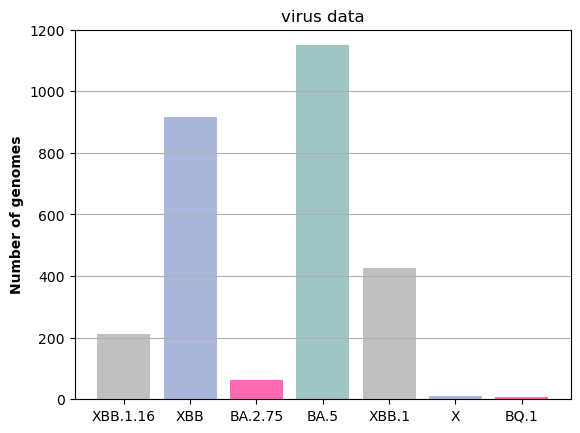

In [34]:
import pandas as pd#the second one
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\20156\\Desktop\\python_example_MY(1)\\example_MY\\summary.tsv',sep='\t')
df.head()
#df.plot.scatter(x='clade_lineage',y='lineage')
list_1=[]
list_dict={}
for it in df['clade_lineage']:
    list_1.append(it)
list_id=set(list_1)
for it in list_id:
    list_dict[it]=list_1.count(it)
print(list_dict)
x=list(list_dict)
y=list(list_dict.values())
plt.bar(x,y,color = ["#C0C0C0","#A9B7DB","hotpink","#9FC6C4"])
plt.title("virus data")
plt.xlabel('',size = 2,fontweight = "bold")
plt.ylim(ymin = 0,ymax = 1200)
plt.ylabel('Number of genomes',size = 10,fontweight = "bold")
plt.grid(axis='y')
plt.show()